Toda la documentación de la API la encontré en: https://developers.google.com/youtube/v3/docs?apix=true&hl=es-419
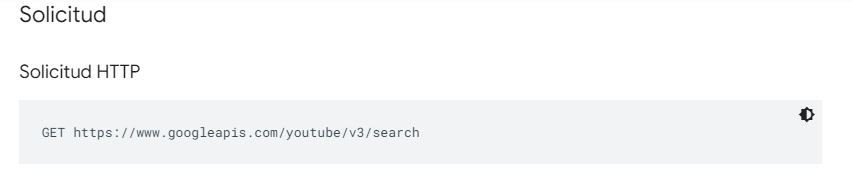

En la sección de search->list están todos los parámetros de esta api. Para hallar el ID del canal de youtube de T-series se puede encontrar buscándolo en el código fuente del perfil principal de su canal buscándolo por el param chanelId.

In [1]:

import requests
import pandas as pd


In [2]:
#Keys
API_KEY = "AXXXXXXXXXXXXXI"
CHANNEL_ID = "UCnJjcn5FrgrOEp5_N45ZLEQ" #Canal con más subscriptores de yv
video_id="kJQP7kiw5Fk" #para usar de ejemplo

In [3]:


url = "https://www.googleapis.com/youtube/v3/search?key="+API_KEY+"&channelId="+CHANNEL_ID+"&part=snippet,id&order=date&maxResults=10000&"
r = requests.get(url)
r.status_code

200

In [4]:
r=r.json()

In [5]:
r["items"][0] 

{'kind': 'youtube#searchResult',
 'etag': 'Zme7zZT6W9kXsJJBmvOqlwISJMY',
 'id': {'kind': 'youtube#video', 'videoId': 'A4XMVTFmKuU'},
 'snippet': {'publishedAt': '2023-05-17T03:48:00Z',
  'channelId': 'UCnJjcn5FrgrOEp5_N45ZLEQ',
  'title': 'Sayyata Vidhi Sayyata Promo Song | Annapoorna Photo Studio | Chaitanya,Lavanya |Prince Henry |Yash R',
  'description': 'T-Series Telugu presents Sayyata Vidhi Sayyata Promo Song from Annapoorna Photo Studio New Telugu Movie starring ...',
  'thumbnails': {'default': {'url': 'https://i.ytimg.com/vi/A4XMVTFmKuU/default.jpg',
    'width': 120,
    'height': 90},
   'medium': {'url': 'https://i.ytimg.com/vi/A4XMVTFmKuU/mqdefault.jpg',
    'width': 320,
    'height': 180},
   'high': {'url': 'https://i.ytimg.com/vi/A4XMVTFmKuU/hqdefault.jpg',
    'width': 480,
    'height': 360}},
  'channelTitle': 'T-Series Telugu',
  'liveBroadcastContent': 'none',
  'publishTime': '2023-05-17T03:48:00Z'}}

In [7]:
url_video = "https://www.googleapis.com/youtube/v3/videos?id="+video_id+"&part=statistics&key="+API_KEY
stats = requests.get(url_video).json()
stats

{'kind': 'youtube#videoListResponse',
 'etag': 'JlRG4BqeDH4NjfYl-8E6UsBQsI4',
 'items': [{'kind': 'youtube#video',
   'etag': '6rPgabWJ7bKm5mUg_55Xo9IMers',
   'id': 'kJQP7kiw5Fk',
   'statistics': {'viewCount': '8155711130',
    'likeCount': '51411923',
    'favoriteCount': '0',
    'commentCount': '4256261'}}],
 'pageInfo': {'totalResults': 1, 'resultsPerPage': 1}}

In [8]:
df = pd.DataFrame(columns=["video_id","video_title","publicacion","vistas","likes","comment_count"]) 

for video in r['items']:
            if video['id']['kind'] == "youtube#video":
                video_id = video['id']['videoId']
                
                titulo = video['snippet']['title']
                
                publicacion = video['snippet']['publishedAt']
              
                
                url_video = "https://www.googleapis.com/youtube/v3/videos?id="+video_id+"&part=statistics&key="+API_KEY
                stats = requests.get(url_video).json()
                
                vistas = stats['items'][0]['statistics']['viewCount']
                likes = stats['items'][0]['statistics']['likeCount']
                comment_count = stats['items'][0]['statistics']['commentCount']


                df = df.append({'video_id':video_id,'video_title':titulo,
                                "publicacion":publicacion,"vistas":vistas,
                                "likes":likes,
                                "comment_count":comment_count},ignore_index=True)
 



In [9]:
df

,video_id,video_title,publicacion,vistas,likes,comment_count
0,A4XMVTFmKuU,Sayyata Vidhi Sayyata Promo Song | Annapoorna ...,2023-05-17T03:48:00Z,1463,53,0
1,ZbAhfM5kjzM,A Collection Of Ananta Sriram Jukebox | Select...,2023-05-16T13:15:24Z,1983,57,3
2,lZb2VixGuJ8,Evergreen Combination Of SPB &amp; P.Susheela ...,2023-05-15T13:00:08Z,1950,40,2
3,iU2rMRZcn1U,Naalo Nene Lenu Lyrical | Rules Ranjann | Kira...,2023-05-15T05:40:02Z,3826918,53965,2044
4,7MoH-SA0naw,Mother&#39;s Day Special Telugu Hits Songs Juk...,2023-05-14T13:00:08Z,2693,105,7
5,CO066WD-n34,Ringa Ringa Rosey Lyrical Video Song | Atharva...,2023-05-14T12:33:12Z,2711800,21123,2132
6,zV07rG_T2Ho,Paisa Re Lyrical Video-OMG (O Manchi Ghost) |...,2023-05-13T11:42:47Z,1821890,10175,2106
7,mf6C95UwC6M,Bye Bye Bye Telugu Audio Song |Thrimurthulu Mo...,2023-05-12T13:30:25Z,3119,37,2
8,gJGzzpq2AXg,"#pakkalocal | #janathagarage | #jrntr, #kajala...",2023-05-12T13:22:19Z,13705,653,2
9,uI_Cjpb9I2M,Naalo Nene Lenu Song Promo | Rules Ranjann | K...,2023-05-12T12:00:50Z,1820813,28652,1166


In [10]:
df.to_csv('youtube.csv')